In [15]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/datos")

dato = pd.read_csv("vgsales.csv",on_bad_lines='skip')
import numpy as np
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Media de Rank:
8282.250783891792
Desviación estándar de Rank:
4791.327753187894
Valor máximo de Rank:
16600
Valor mínimo de Rank:
1
--------------------------
Global_Sales normalizada: 52.40809436768686
Media de Global_Sales después de la normalización: 0.0
Desviación estándar de Global_Sales después de la normalización: 1.0000307422721686
Valor máximo de Global_Sales después de la normalización: 52.40809436768686
Valor mínimo de Global_Sales después de la normalización: -0.33899127535416135


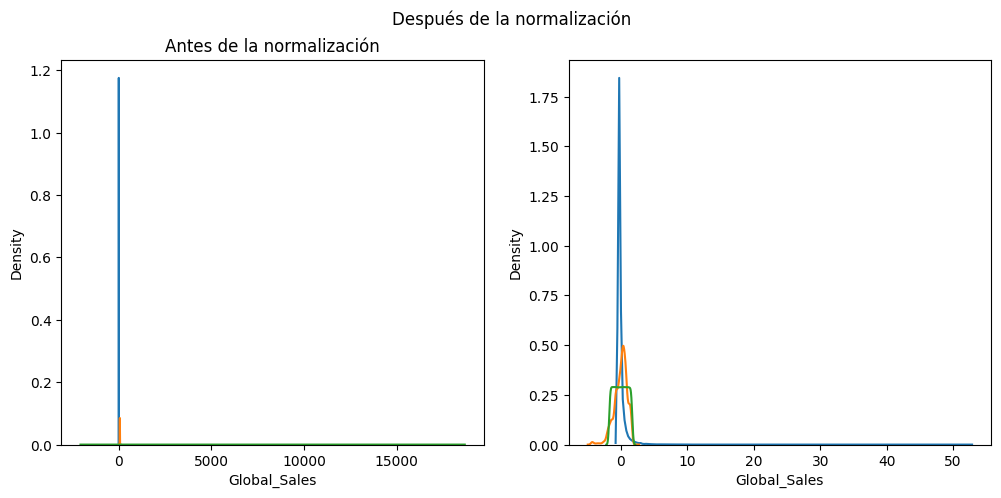

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dato = pd.read_csv("vgsales.csv", on_bad_lines='skip', sep=';')

# Eliminar filas con datos faltantes
dato.dropna(inplace=True)

# Agregar una nueva columna para definir en valores más simples los años
dato['year2'] = dato.groupby('Year')['Year'].transform(lambda x: x - 1950)

# Crear un nuevo DataFrame llamado df a partir de dato
df = pd.DataFrame(dato)

# Cálculos de Rank
print("Media de Rank:")
print(df['Rank'].mean())

print("Desviación estándar de Rank:")
print(df['Rank'].std())

print("Valor máximo de Rank:")
print(df['Rank'].max())

print("Valor mínimo de Rank:")
print(df['Rank'].min())

# Gráfico antes de la normalización
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Antes de la normalización")
sns.kdeplot(df['Global_Sales'], ax=ax1)
sns.kdeplot(df['year2'], ax=ax1)
sns.kdeplot(df['Rank'], ax=ax1)

# Normalización de las columnas year2, Global_Sales y Rank
scaler = preprocessing.StandardScaler()
df[['year2', 'Global_Sales', 'Rank']] = scaler.fit_transform(df[['year2', 'Global_Sales', 'Rank']])

# Cálculos de la columna Global_Sales después de la normalización
print("--------------------------")
print("Global_Sales normalizada:", df['Global_Sales'].iloc[0])
print("Media de Global_Sales después de la normalización:", df['Global_Sales'].mean())
print("Desviación estándar de Global_Sales después de la normalización:", df['Global_Sales'].std())
print("Valor máximo de Global_Sales después de la normalización:", df['Global_Sales'].max())
print("Valor mínimo de Global_Sales después de la normalización:", df['Global_Sales'].min())

# Gráfico después de la normalización
fig.suptitle("Después de la normalización")
sns.kdeplot(df['Global_Sales'], ax=ax2)
sns.kdeplot(df['year2'], ax=ax2)
sns.kdeplot(df['Rank'], ax=ax2)

plt.show()